In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,x,y
0,-1.713596,-1.323670
1,5.775453,-0.621836
2,2.475194,0.743951
3,3.109859,0.315002
4,4.506123,-0.835822
5,-4.759989,1.127808
6,5.394654,-0.616893
7,-5.521587,1.375945
8,-6.283185,0.261887
9,-2.729060,-0.547327


In [4]:
df.shape

(70, 2)

In [5]:
x = df[["x"]].to_numpy()

In [6]:
x.shape

(70, 1)

In [7]:
y = df[["y"]].to_numpy()

In [8]:
y.shape

(70, 1)

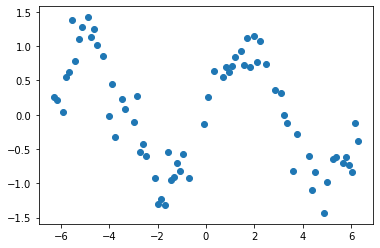

In [9]:
plt.scatter(x,y)

In [10]:
def expand_x(arr,k=1):
    li = [arr**i for i in range(1,k+1)]
    temp = np.hstack(tuple(li))
    return temp

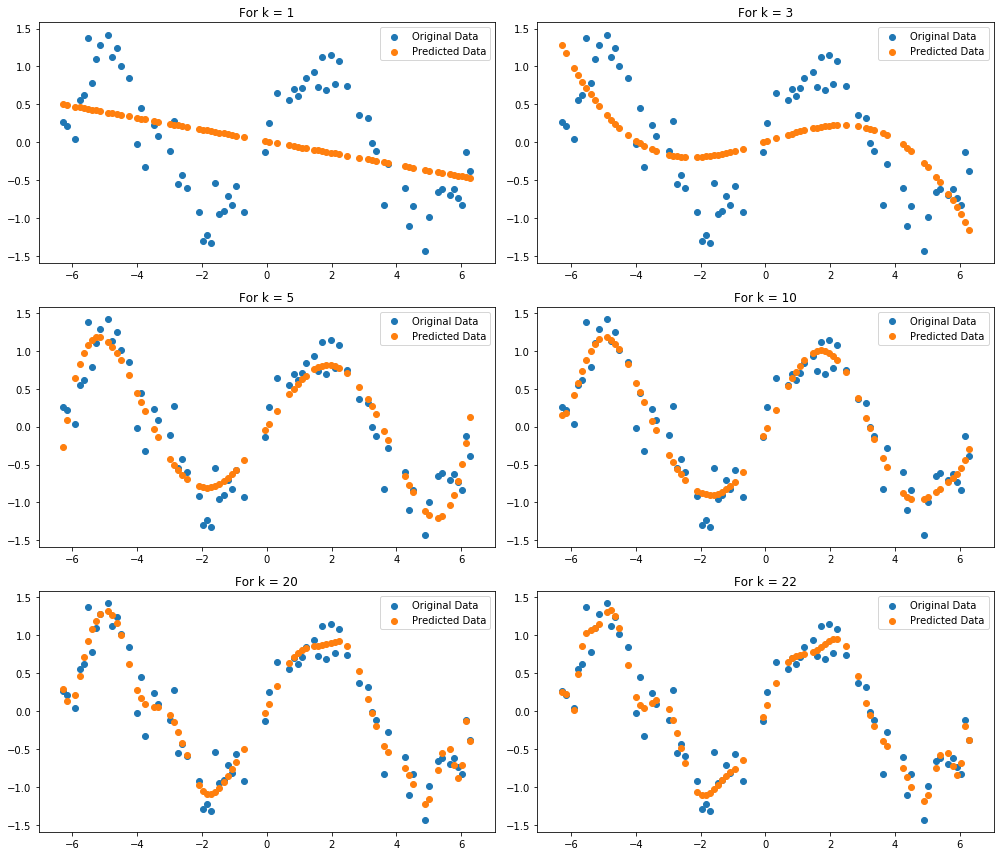

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()
for j,i in enumerate([1,3,5,10,20,22]):
    ax = axes[j]
    exp_x = expand_x(x,i)
    exp_x = np.hstack((np.ones((x.shape[0],x.shape[1])),exp_x))
    theta = np.zeros((exp_x.shape[1],1))
    theta = ((np.linalg.inv(exp_x.T@exp_x)) @ exp_x.T ) @ y
    ax.scatter(x,y,label="Original Data")
    ax.scatter(x,exp_x@theta,label="Predicted Data")
    ax.legend()
    ax.set_title(f"For k = {i}")
plt.tight_layout()

In [70]:
df_test = pd.read_csv("test.csv")

In [71]:
df_test

,x,y
0,-0.317333,-0.272526
1,0.444266,0.744142
2,-2.348261,-0.425099
3,0.571199,0.197005
4,-0.571199,-0.499424
5,4.759989,-1.283338
6,-0.825065,-0.082456
7,3.871458,-0.184155
8,2.982926,0.475806
9,-0.190400,-0.250677


In [72]:
test_x,test_y = df_test[["x"]].to_numpy(),df_test[["y"]].to_numpy()

In [73]:
test_x.shape

(15, 1)

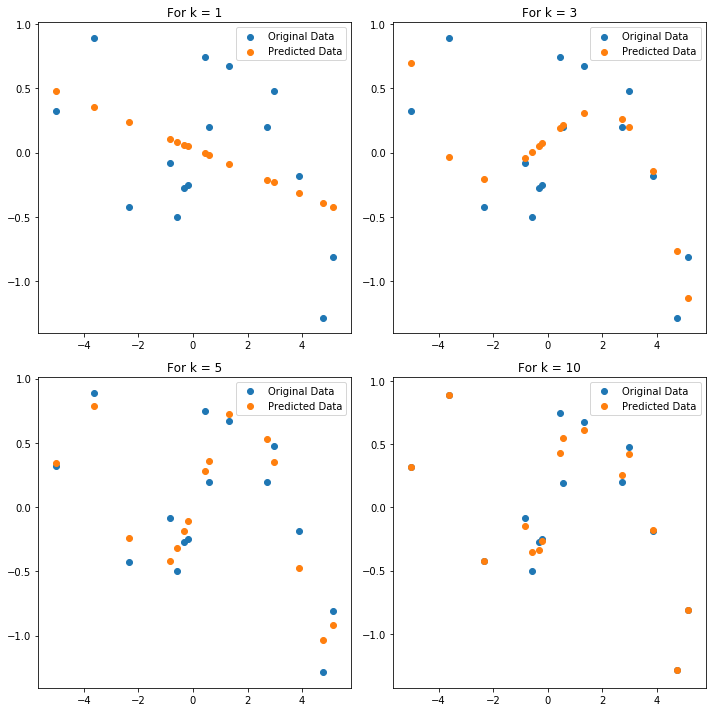

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
for j,i in enumerate([1,3,5,10]):
    ax = axes[j]
    exp_x = expand_x(test_x,i)
    exp_x = np.hstack((np.ones((test_x.shape[0],test_x.shape[1])),exp_x))
    theta = np.zeros((exp_x.shape[1],1))
    theta = ((np.linalg.inv(exp_x.T@exp_x)) @ exp_x.T ) @ test_y
    ax.scatter(test_x,test_y,label="Original Data")
    ax.scatter(test_x,exp_x@theta,label="Predicted Data")
    ax.legend()
    ax.set_title(f"For k = {i}")
plt.tight_layout()